In [1]:
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import numpy as np
import matplotlib as plt
import pandas as pd
import csv

In [4]:
#Import the data set

#!wget -O weather-stations20140101-20141231.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/weather-stations20140101-20141231.csv

!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/weather-stations20140101-20141231.csv -O weather-stations20140101-20141231.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  126k  100  126k    0     0   102k      0  0:00:01  0:00:01 --:--:--  103k
curl: (6) Could not resolve host: weather-stations20140101-20141231.csv


In [4]:
filename = 'weather-stations20140101-20141231.csv'

#Read csv
pdf = pd.read_csv(filename)
print('Shape of the dataset :', pdf.shape)

pdf.head(10)

Shape of the dataset : (1341, 25)


Stn_Name     Lat     Long Prov   Tm  DwTm    D    Tx  DwTx  \
0               CHEMAINUS  48.935 -123.742   BC  8.2   0.0  NaN  13.5   0.0   
1  COWICHAN LAKE FORESTRY  48.824 -124.133   BC  7.0   0.0  3.0  15.0   0.0   
2           LAKE COWICHAN  48.829 -124.052   BC  6.8  13.0  2.8  16.0   9.0   
3        DISCOVERY ISLAND  48.425 -123.226   BC  NaN   NaN  NaN  12.5   0.0   
4     DUNCAN KELVIN CREEK  48.735 -123.728   BC  7.7   2.0  3.4  14.5   2.0   
5       ESQUIMALT HARBOUR  48.432 -123.439   BC  8.8   0.0  NaN  13.1   0.0   
6           GALIANO NORTH  48.985 -123.573   BC  8.9   7.0  NaN  13.5   7.0   
7                 MALAHAT  48.575 -123.530   BC  7.2   1.0  NaN  12.7   1.0   
8               METCHOSIN  48.374 -123.561   BC  NaN   NaN  NaN   NaN   NaN   
9          NORTH COWICHAN  48.824 -123.718   BC  NaN   NaN  NaN   NaN   NaN   

    Tn  ...   DwP    P%N  S_G    Pd  BS  DwBS  BS%    HDD  CDD   Stn_No  
0  1.0  ...   0.0    NaN  0.0  12.0 NaN   NaN  NaN  273.3  0.0  1011500  
1 -3.0  ...   0.0  104.0  0.0  12.0 NaN   NaN  NaN  307.0  0.0  1012040  
2 -2.5  ...   9.0    NaN  NaN  11.0 NaN   NaN  NaN  168.1  0.0  1012055  
3  NaN  ...   NaN    NaN  NaN   NaN NaN   NaN  NaN    NaN  NaN  1012475  
4 -1.0  ...   2.0    NaN  NaN  11.0 NaN   NaN  NaN  267.7  0.0  1012573  
5  1.9  ...   8.0    NaN  NaN  12.0 NaN   NaN  NaN  258.6  0.0  1012710  
6  2.0  ...   7.0    NaN  0.0  10.0 NaN   NaN  NaN  191.7  0.0  10130MN  
7  2.2  ...  10.0    NaN  NaN  12.0 NaN   NaN  NaN  290.8  0.0  1014820  
8  NaN  ...   0.0   95.0  0.0  16.0 NaN   NaN  NaN    NaN  NaN  1015105  
9  NaN  ...   0.0  114.0  0.0  13.0 NaN   NaN  NaN    NaN  NaN  1015628  

[10 rows x 25 columns]

In [5]:
#----Cleanup data-----
#Remove rows that don't have any value in the Tm field.
pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop=True)
pdf.head(10)

Stn_Name     Lat     Long Prov   Tm  DwTm    D    Tx  DwTx  \
0               CHEMAINUS  48.935 -123.742   BC  8.2   0.0  NaN  13.5   0.0   
1  COWICHAN LAKE FORESTRY  48.824 -124.133   BC  7.0   0.0  3.0  15.0   0.0   
2           LAKE COWICHAN  48.829 -124.052   BC  6.8  13.0  2.8  16.0   9.0   
3     DUNCAN KELVIN CREEK  48.735 -123.728   BC  7.7   2.0  3.4  14.5   2.0   
4       ESQUIMALT HARBOUR  48.432 -123.439   BC  8.8   0.0  NaN  13.1   0.0   
5           GALIANO NORTH  48.985 -123.573   BC  8.9   7.0  NaN  13.5   7.0   
6                 MALAHAT  48.575 -123.530   BC  7.2   1.0  NaN  12.7   1.0   
7          NORTH COWICHAN  48.824 -123.719   BC  7.7   0.0  NaN  14.7   0.0   
8     NORTH PENDER ISLAND  48.764 -123.287   BC  8.6   1.0  NaN  14.0   1.0   
9              RACE ROCKS  48.298 -123.531   BC  9.6   0.0  NaN  15.6   0.0   

    Tn  ...   DwP    P%N  S_G    Pd  BS  DwBS  BS%    HDD  CDD   Stn_No  
0  1.0  ...   0.0    NaN  0.0  12.0 NaN   NaN  NaN  273.3  0.0  1011500  
1 -3.0  ...   0.0  104.0  0.0  12.0 NaN   NaN  NaN  307.0  0.0  1012040  
2 -2.5  ...   9.0    NaN  NaN  11.0 NaN   NaN  NaN  168.1  0.0  1012055  
3 -1.0  ...   2.0    NaN  NaN  11.0 NaN   NaN  NaN  267.7  0.0  1012573  
4  1.9  ...   8.0    NaN  NaN  12.0 NaN   NaN  NaN  258.6  0.0  1012710  
5  2.0  ...   7.0    NaN  0.0  10.0 NaN   NaN  NaN  191.7  0.0  10130MN  
6  2.2  ...  10.0    NaN  NaN  12.0 NaN   NaN  NaN  290.8  0.0  1014820  
7 -2.6  ...   0.0    NaN  0.0  12.0 NaN   NaN  NaN  288.8  0.0  1015630  
8  2.0  ...   1.0    NaN  0.0  13.0 NaN   NaN  NaN  253.6  0.0  1015638  
9  5.2  ...   NaN    NaN  NaN   NaN NaN   NaN  NaN  234.7  0.0  1016640  

[10 rows x 25 columns]

Stn_Name     Lat     Long Prov    Tm  DwTm    D    Tx  \
0                  CHEMAINUS  48.935 -123.742   BC   8.2   0.0  NaN  13.5   
1     COWICHAN LAKE FORESTRY  48.824 -124.133   BC   7.0   0.0  3.0  15.0   
2              LAKE COWICHAN  48.829 -124.052   BC   6.8  13.0  2.8  16.0   
3        DUNCAN KELVIN CREEK  48.735 -123.728   BC   7.7   2.0  3.4  14.5   
4          ESQUIMALT HARBOUR  48.432 -123.439   BC   8.8   0.0  NaN  13.1   
...                      ...     ...      ...  ...   ...   ...  ...   ...   
1251                  NAIN A  56.550  -61.683   NL -22.6   0.0 -5.2  -6.8   
1252                  NAIN A  56.551  -61.682   NL -19.2  24.0  NaN  -7.5   
1253                  SAGLEK  58.333  -62.586   NL -24.4   2.0  NaN -13.5   
1254            TUKIALIK BAY  54.716  -58.358   NL -22.8   2.0  NaN  -5.8   
1255                WABUSH A  52.923  -66.865   NL -27.7   0.0  NaN -13.6   

      DwTx    Tn  ...   DwP    P%N   S_G    Pd  BS  DwBS  BS%     HDD  CDD  \
0      0.0   1.0  ...   0.0    NaN   0.0  12.0 NaN   NaN  NaN   273.3  0.0   
1      0.0  -3.0  ...   0.0  104.0   0.0  12.0 NaN   NaN  NaN   307.0  0.0   
2      9.0  -2.5  ...   9.0    NaN   NaN  11.0 NaN   NaN  NaN   168.1  0.0   
3      2.0  -1.0  ...   2.0    NaN   NaN  11.0 NaN   NaN  NaN   267.7  0.0   
4      0.0   1.9  ...   8.0    NaN   NaN  12.0 NaN   NaN  NaN   258.6  0.0   
...    ...   ...  ...   ...    ...   ...   ...  ..   ...  ...     ...  ...   
1251   0.0 -33.5  ...   0.0   66.0  74.0   5.0 NaN   NaN  NaN  1136.5  0.0   
1252  17.0   NaN  ...  17.0    NaN   NaN   4.0 NaN   NaN  NaN   148.7  0.0   
1253   1.0 -32.3  ...   NaN    NaN   NaN   NaN NaN   NaN  NaN  1101.2  0.0   
1254   1.0 -32.5  ...   NaN    NaN   NaN   NaN NaN   NaN  NaN  1060.0  0.0   
1255   0.0 -46.8  ...   0.0    NaN   NaN   2.0 NaN   NaN  NaN  1279.9  0.0   

       Stn_No  
0     1011500  
1     1012040  
2     1012055  
3     1012573  
4     1012710  
...       ...  
1251  8502800  
1252  8502801  
1253  8503249  
1254  8503992  
1255  8504177  

[1231 rows x 25 columns]

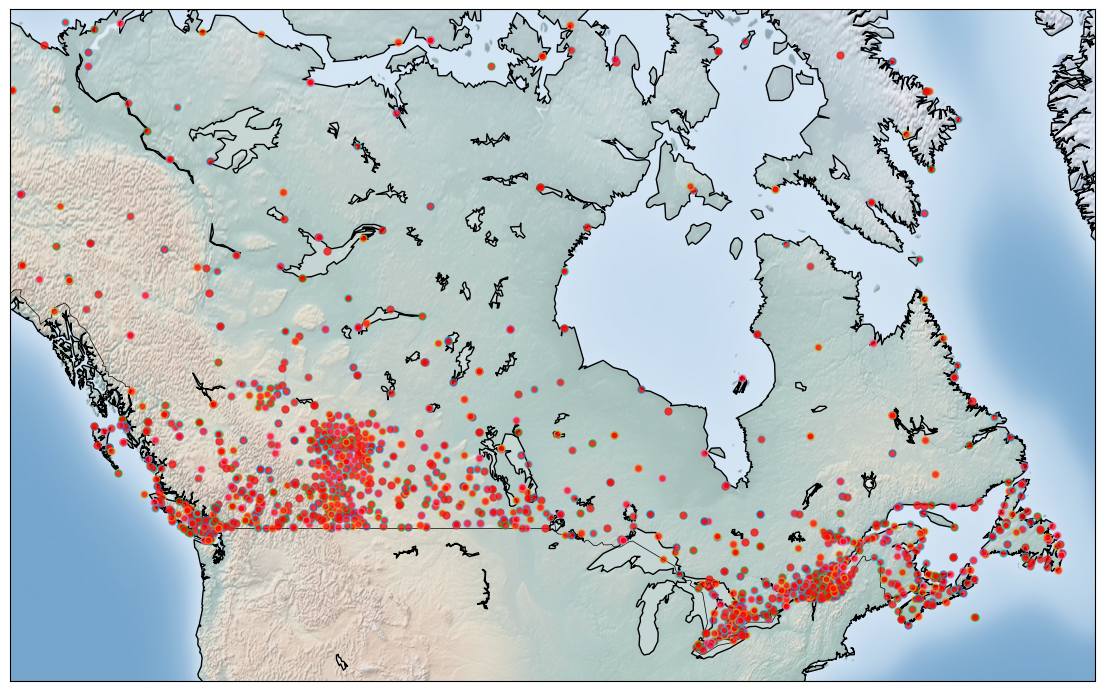

In [6]:
#----Visualization------

#Matplotlib basemap toolkit is a library for plotting 2D data on maps in Python.
#Basemap does not do any plotting on it’s own, but provides the facilities to transform coordinates to a map projections.

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams #to customize default styles of Matplotlib
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

#define the longitude and latitude for the visualization so tha Long and Lat are fitting within these bounds
llon=-140 
ulon=-50
llat=40
ulat=70

#define a new array, where the predefined bounds are applied
pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

display(pdf)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()


In [7]:
#-----Clustering the stations------
#DBSCAN form sklearn library can run DBSCAN clustering from vector array or distance matrix.
#In our case, we pass it the Numpy array Clus_dataSet
#to find core samples of high density and expands clusters from them.

from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

#Compute dbscan
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
display(core_samples_mask)

core_samples_mask[db.core_sample_indices_] = True
display(core_samples_mask)

labels = db.labels_
pdf["Clus_Db"]=labels
display(labels)

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

array([False, False, False, ..., False, False, False])

array([ True,  True,  True, ..., False, False, False])

array([ 0,  0,  0, ..., -1, -1, -1])

Stn_Name    Tx   Tm  Clus_Db
0               CHEMAINUS  13.5  8.2        0
1  COWICHAN LAKE FORESTRY  15.0  7.0        0
2           LAKE COWICHAN  16.0  6.8        0
3     DUNCAN KELVIN CREEK  14.5  7.7        0
4       ESQUIMALT HARBOUR  13.1  8.8        0

In [8]:
set(labels)

{-1, 0, 1, 2, 3, 4}

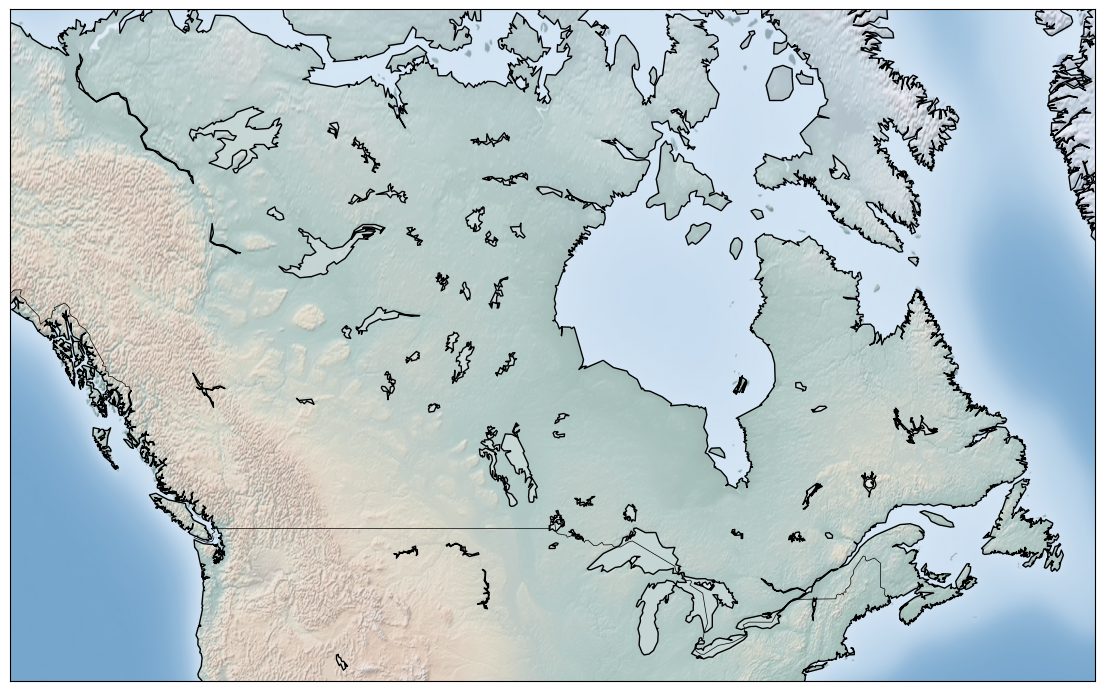

In [9]:
#-------Visualization of clusters based on location-------
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)


my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()


# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

plt.show()

In [15]:
#---Rerun DBSCAN on a 5-dimensional data set
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym','Tx','Tm','Tn']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

display(Clus_dataSet)


# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

display(labels)

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

array([[-1.14845892, -0.37604529,  1.25080156,  1.96002173,  2.15180416],
       [-1.16521244, -0.39360705,  1.42953313,  1.84173724,  1.83284082],
       [-1.16174177, -0.39281682,  1.5486875 ,  1.82202316,  1.87271124],
       ...,
       [ 1.47194585,  1.28185935, -1.96636668, -1.25337359, -0.50356564],
       [ 1.65310667,  0.5989259 , -1.04887796, -1.09566094, -0.51951381],
       [ 1.28859978,  0.28284015, -1.97828211, -1.57865594, -1.65980774]])

array([ 0,  0,  0, ..., -1, -1, -1])

Stn_Name    Tx   Tm  Clus_Db
0               CHEMAINUS  13.5  8.2        0
1  COWICHAN LAKE FORESTRY  15.0  7.0        0
2           LAKE COWICHAN  16.0  6.8        0
3     DUNCAN KELVIN CREEK  14.5  7.7        0
4       ESQUIMALT HARBOUR  13.1  8.8        0

Cluster 0, Avg Temp: 6.244886363636363
Cluster 1, Avg Temp: -0.5523809523809524
Cluster 2, Avg Temp: -3.244444444444445
Cluster 3, Avg Temp: -13.81902834008097
Cluster 4, Avg Temp: -4.226923076923077
Cluster 5, Avg Temp: -16.411881188118812
Cluster 6, Avg Temp: -10.178947368421053
Cluster 7, Avg Temp: -4.371428571428572


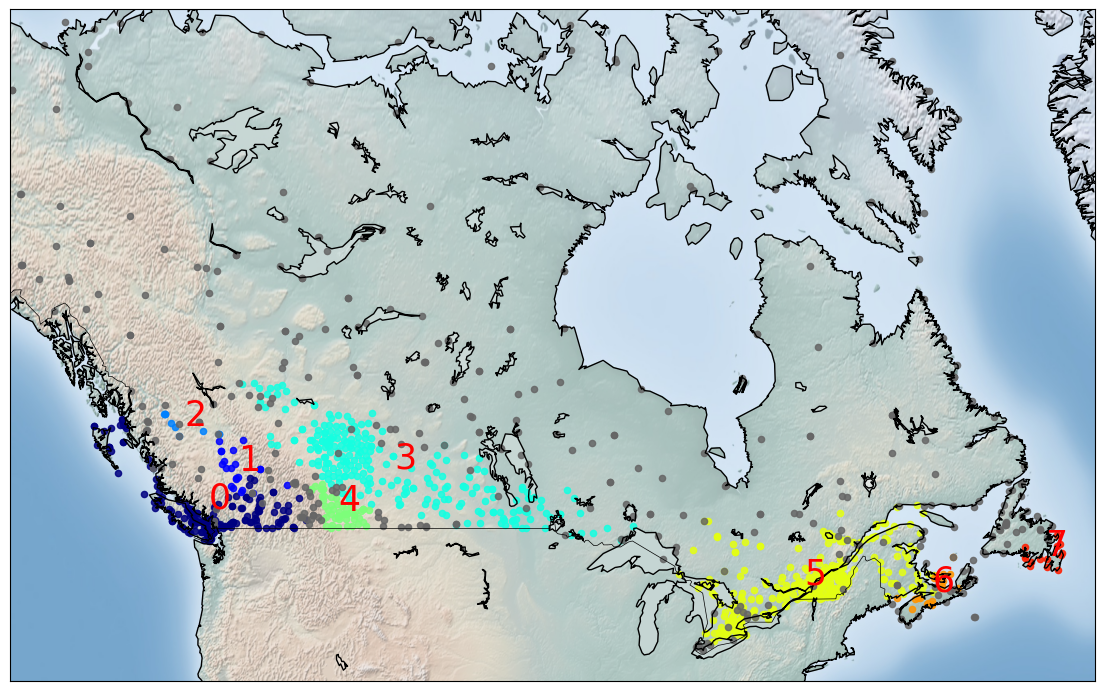

In [19]:
#-----Visualization of clusters based on location and Temperture----

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)


my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()


# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int64(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))